1. Napisać własną implementację interpolacji wielomianowej stosując wprost wzór na wielomian interpolacyjny  Lagrange'a .  Przetestować swoją implementację na wylosowanych węzłach interpolacji w wybranym przedziale. Narysować wykres wielomianu interpolacyjnego w tym przedziale wraz z wezlami interpolacji. <b>(1 pkt)</b>


### Wielomian interpolacyjny Lagrange'a

In [20]:
function lagrange_interpolation(x::AbstractVector{T}, y::AbstractVector{T}, z::T) where T <: Real
    n = length(x)
    p = zero(T)
    for i in 1:n
        li = one(T)
        for j in 1:n
            if i != j
                li *= (z - x[j]) / (x[i] - x[j])
            end
        end
        p += y[i] * li
    end
    return p
end

lagrange_interpolation (generic function with 2 methods)

#### Implementacja na losowych węzłach i  wykres wielomianu interpolacyjnego

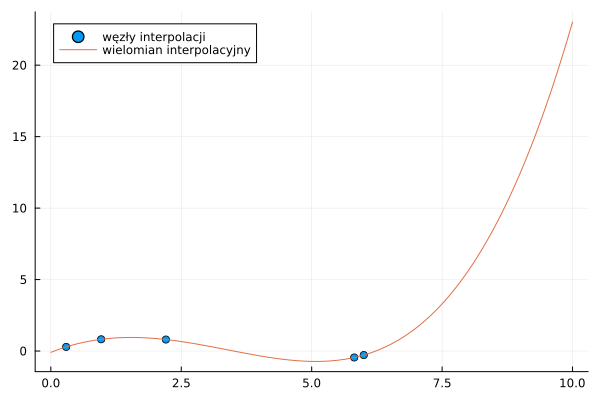

In [21]:
# obliczmy wartości wielomianu interpolacyjnego w przedziale [0, 10]
x = sort(rand(5) * 10)
y = sin.(x)
z = collect(range(0, stop=10, length=100))
p = map(z) do z_i
    lagrange_interpolation(x, y, z_i)
end

# narysujmy wykres
scatter(x, y, label="węzły interpolacji")
plot!(z, p, label="wielomian interpolacyjny")

2. Zrobic to samo dla metody  Newtona (metoda ilorazów róznicowych).Narysować wykres wielomianu interpolacyjnego otrzymanego metodą Newtona dla tych samych danych, co w poprzednim punkcie. Zadbać o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji, według schematu z pakietu Interpolations http://juliamath.github.io/Interpolations.jl/stable/interpolations/ : 
   1. napisać funkcję `NewtonInterpolation`, która wylicza ilorazy różnicowe i zwraca "obiekt interpolacyjny" `newt`
   1. napisać funkcję która wylicza wartość wielomianu dla obiektu `newt` w punkcie x za pomocą  <b>schematu Hornera dla postaci Newtona </b> <b>(2 pkt)</b>


### Metoda Newtona (ilorazów różnicowych)

In [24]:
using Interpolations

function NewtonInterpolation(x::AbstractVector{T}, y::AbstractVector{T}) where T <: Real
    n = length(x)
    F = Matrix{T}(undef, n, n)
    F[:,1] .= y
    for j in 2:n
        for i in j:n
            F[i,j] = (F[i,j-1] - F[i-1,j-1]) / (x[i] - x[i-j+1])
        end
    end
    return scale(interpolate(F[:,1], BSpline(Linear())), x), F
end


NewtonInterpolation (generic function with 1 method)

3. Zastosować interpolację wielomianową z pakietu Polynomials do tych samych danych, co w poprzednich punktach. Porównać wszystkie 3 wyniki interpolacji wielomianowej na jednym wykresie. Co zauważamy? Dlaczego? <b>(1 pkt)</b>

4. Porównać metody poprzez pomiar czasu wykonania dla zmiennej ilości węzłow interpolacji. Uwaga: dodatkowo, dla metody Newtona i pakietu Polynomials należy osobno zmierzyć czas wyliczania wielomianu i osobno czas wyliczania wartości w punkcie. Dokonać pomiaru 10 razy i policzyć wartość średnią oraz oszacować błąd pomiaru za pomocą odchylenia standardowego; wyniki przedstawić na wykresach. <b>(2 pkt)</b>


5. Zaimplementować algorytm Neville’a i sprawdzić (dla kilku wybranych punktów), czy daje te same wartości wielomianu co wybrana interpolacja wielomianowa.<b>(1 pkt)</b>

6. Poeksperymentować z  interpolacją funkcjami sklejanymi (minimum dwie różne funkcje sklejane),  narysować wykresy i porównać z wykresami interpolacji wielomianowej. <b>Zademonstrować  efekt Rungego</b> <b>(1 pkt)</b>. 